In [5]:
import numpy as np
max_dist_from_goal = 100
x = np.arange(-100, 150, 1)
y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
            5 / max_dist_from_goal)), -1, 1)

/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: invalid value encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(


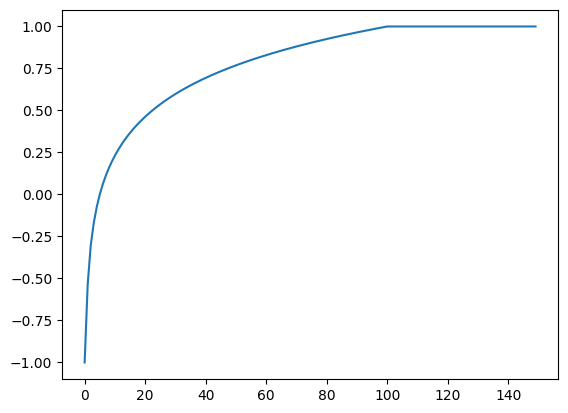

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [10]:
def log_precision(x, x_goal=0.8, x_max=16) -> float:

    epsilon = 0.001  # Protection against log(0.0)
    return 1 - np.clip((np.log(max(x, epsilon) / x_max) / np.log(max(x_goal, epsilon) / x_max)), 0, 1)
x = np.arange(-20, 20, 1)
y = np.array([-log_precision(i) for i in x])

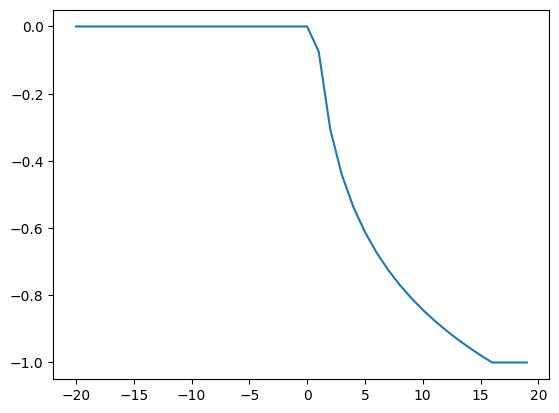

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [ ]:
# def asymmetric_l2_loss(u, tau):
#     return torch.mean(torch.abs(tau - (u < 0).float()) * u**2)

In [8]:
import numpy as np
import torch
def asymmetric_l2_loss(u, tau):

    return (torch.abs(tau - (u < 0).float()) * u**2)

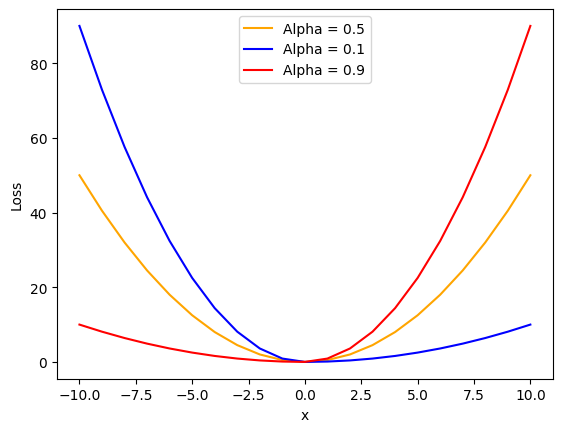

In [20]:
x = torch.tensor(np.arange(-10, 11, 1))
y = np.array([asymmetric_l2_loss(i,0.5) for i in x])
y2 = np.array([asymmetric_l2_loss(i,0.1) for i in x])
y3 = np.array([asymmetric_l2_loss(i,0.9) for i in x])
import matplotlib.pyplot as plt

plt.plot(x.numpy(), y,  label='Alpha = 0.5',color='orange',)
plt.plot(x.numpy(), y2, label='Alpha = 0.1',color='blue',)
plt.plot(x.numpy(), y3, label='Alpha = 0.9',color='red',)

plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.savefig('asymmetric_l2_loss.png')